In [1]:
## Tested using the following loaded modules
## module use /g/data/access/ngm/modules
## module load analysis3/21.10
import os, sys
workdir = "/g/data/xv83/users/bxn599/ACS/evaluation/"
os.chdir(workdir)
sys.path.append("./lib")
import glob
import xarray as xr
import numpy as np
import geopandas as gp
from datetime import datetime as dt
import lib_standards
import lib_spatial
import spatial_selection
import matplotlib as mpl
import matplotlib.pyplot as plt
import importlib
importlib.reload(lib_standards)
import warnings
warnings.filterwarnings('ignore')

font = {'size'   : 12}
mpl.rc('font', **font)

In [2]:
DATA_LOCATIONS = {
    'AGCD': "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/indices/AUS-r005/none/BOM-AGCD/historical/none/none/none/climdex",
    'BARPA-R:ERA5': "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/indices/AUS-15/BOM/ECMWF-ERA5/evaluation/none/BOM-BARPA-R/v1/climdex",
    'ERA5': "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/indices/AUS-25/none/ECMWF-ERA5/historical/none/none/none/climdex",
    'CCAM:ERA5': "/g/data/ia39/australian-climate-service/test-data/CORDEX-CMIP6/indices/AUS-10/CSIRO/ECMWF-ERA5/evaluation/none/CSIRO-CCAM-2203/v1/climdex",
}
# Frequency of icclim indicator
FREQ = 'month'
# Data sources to consider here
SOURCES = ['BARPA-R:ERA5', 'CCAM:ERA5', 'AGCD', 'ERA5']
# Grid to used as the reference grid to compute difference metrics
REFERENCE_GRID = 'AGCD'
# "Truth" for compute difference metrics
REFERENCE = 'AGCD'
# Region of interest, as per defined in lib_standards.DOMAINS
REGION = 'Australia'  
# Period of interest, as per defined in lib_standards.PERIODS
PERIOD = 'HISTORICAL_WHOLE' 
SEASON='all'

In [3]:
def prepare_data(index, sources=SOURCES, freq=FREQ, region=REGION, period=PERIOD, reference_grid=REFERENCE_GRID, season=SEASON):
    """
    Reads in the icclim data and regrid to the reference grid.
    """
    # Load the data sources
    ds = {}
    for s in sources:
        #print("Reading the data {:}".format(s))
        fs = glob.glob(os.path.join(DATA_LOCATIONS[s], index, "{index}_*_{freq}_*.nc".format(index=index, freq=freq)))
        ds[s] = xr.open_dataset(fs[0])
        ds[s] = lib_standards.standardise_data(ds[s], region=region, period=period, season=season, compute=True)

    # Regrid to the REFERENCE_GRID
    ds_regrid = {}
    for s in sources:
        #print("Regridding the data {:} to reference grid of {:}".format(s, reference_grid))
        #ds_regrid[s] = lib_spatial.add_region_land_mask(ds[s], region)
        ds_regrid[s] = ds[s]
        if s == reference_grid:
            ds_regrid[s] = ds_regrid[s].compute()
        else:
            ds_regrid[s] = lib_standards.regrid(ds_regrid[s], ds[reference_grid]).compute()
    return ds_regrid

# DTR: Mean Diurnal Temperature Range

index = DTR
index = DTR:DJF
index = DTR:MAM
index = DTR:JJA
index = DTR:SON


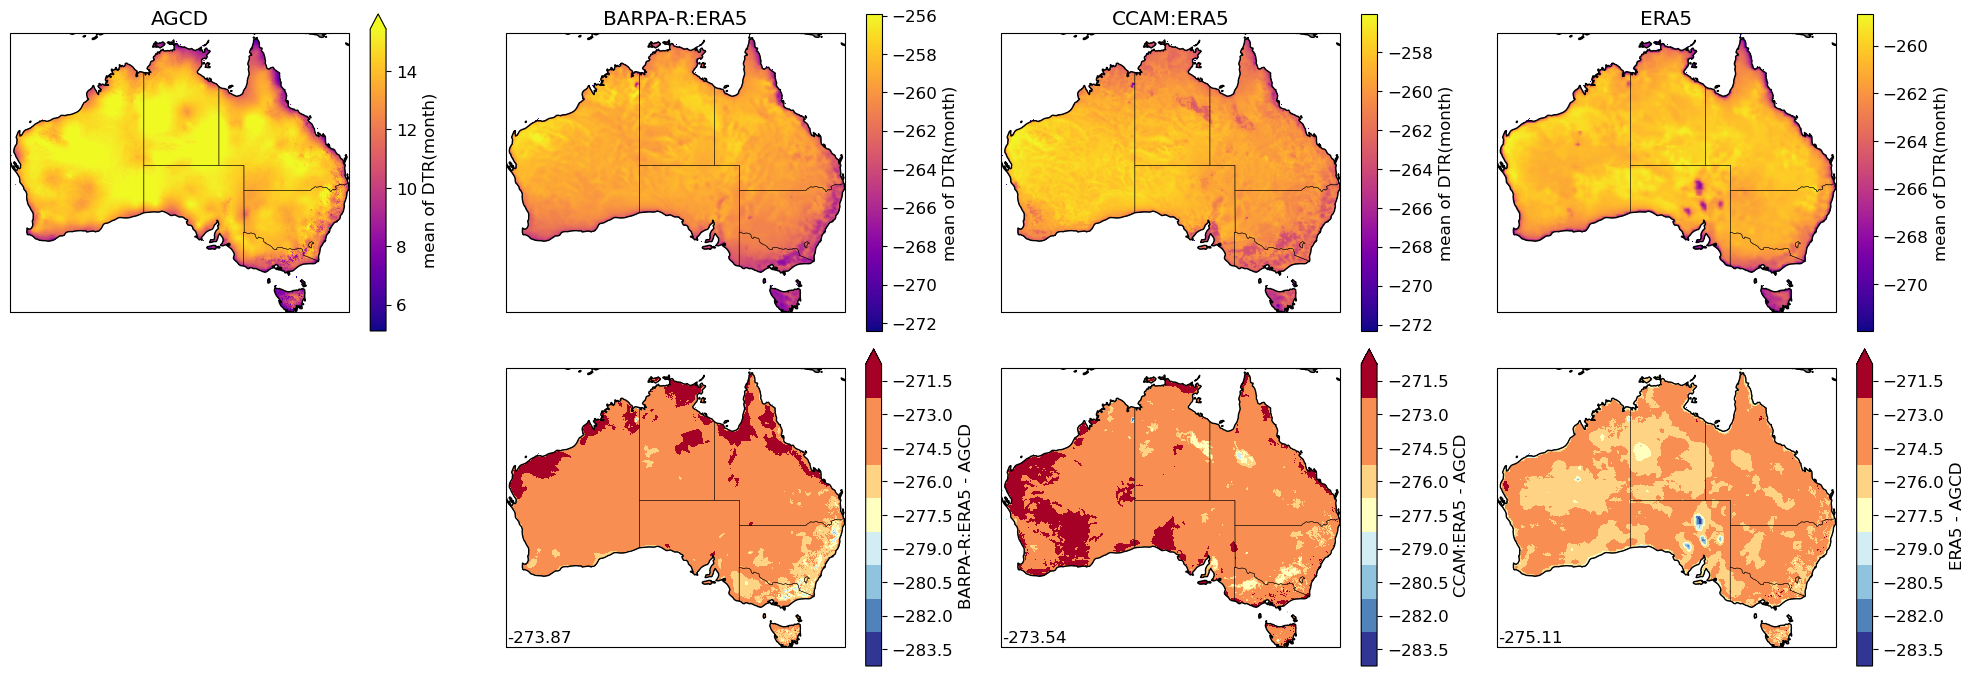

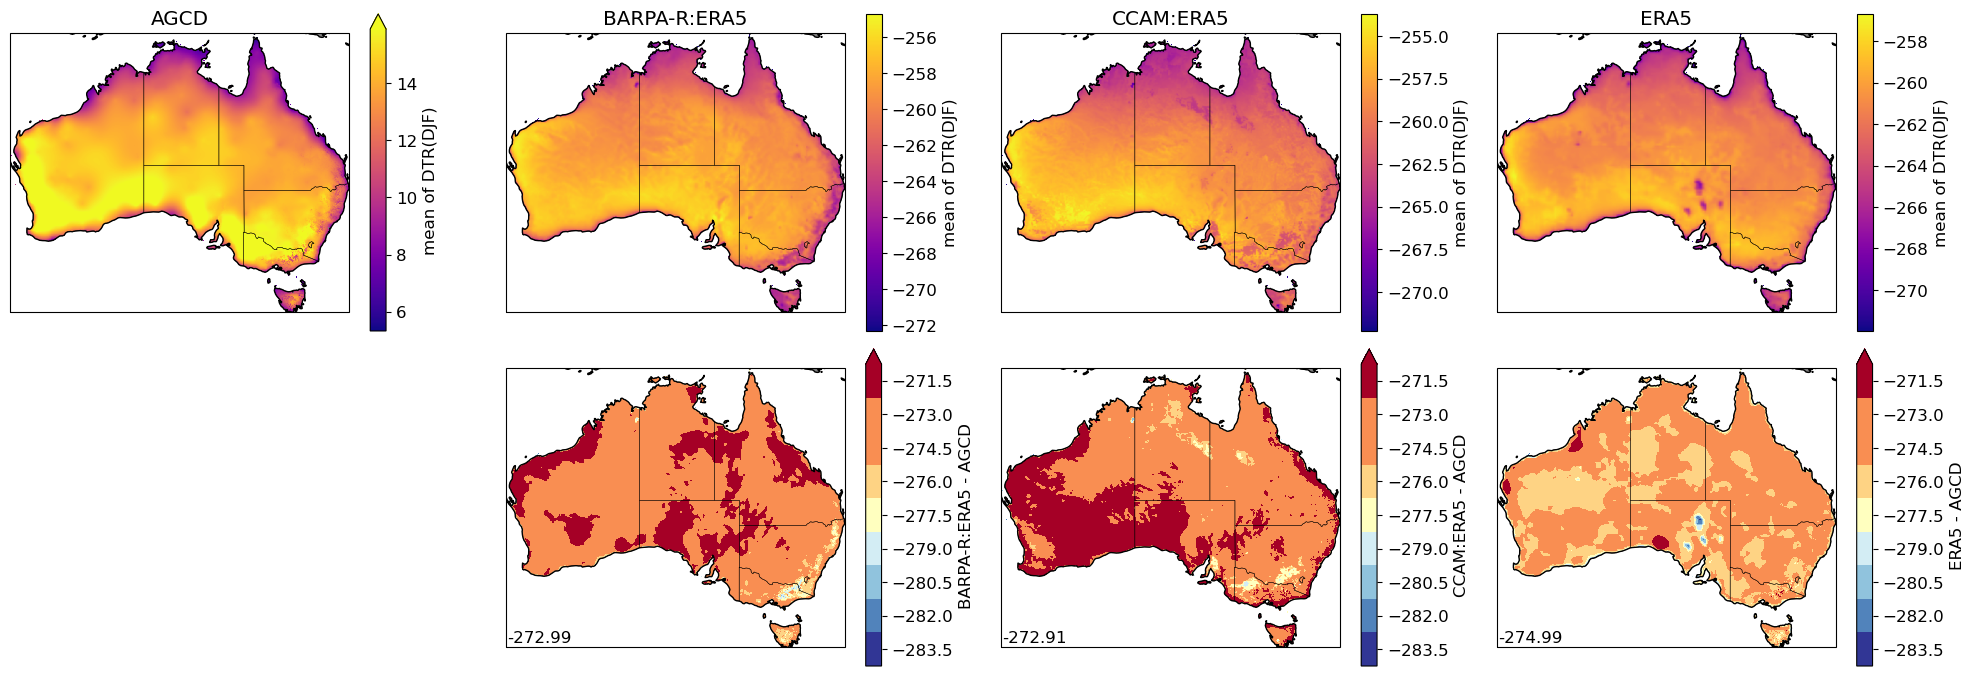

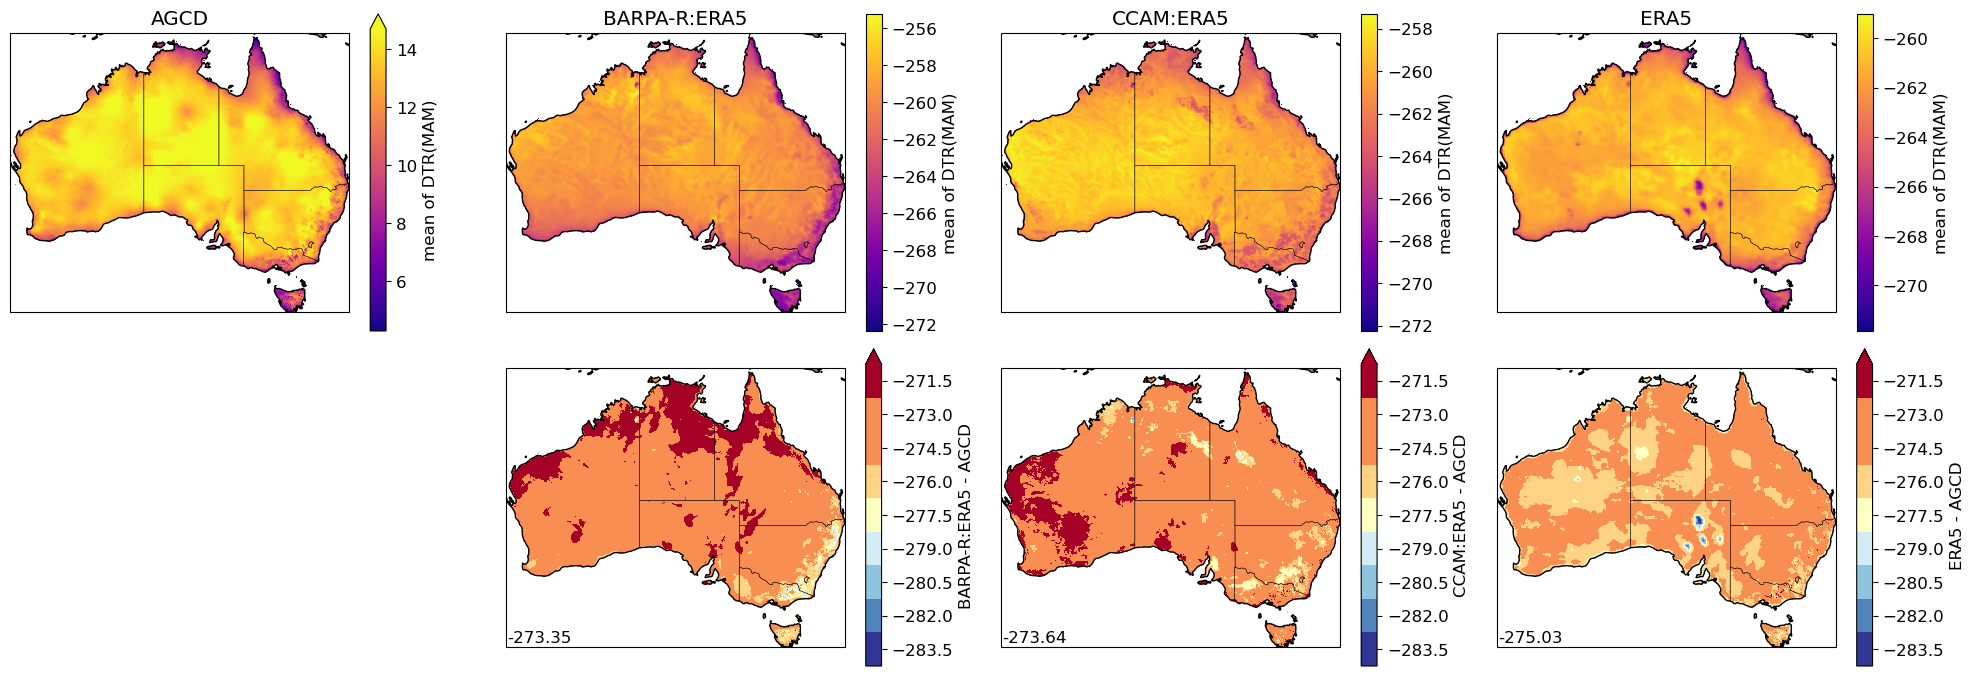

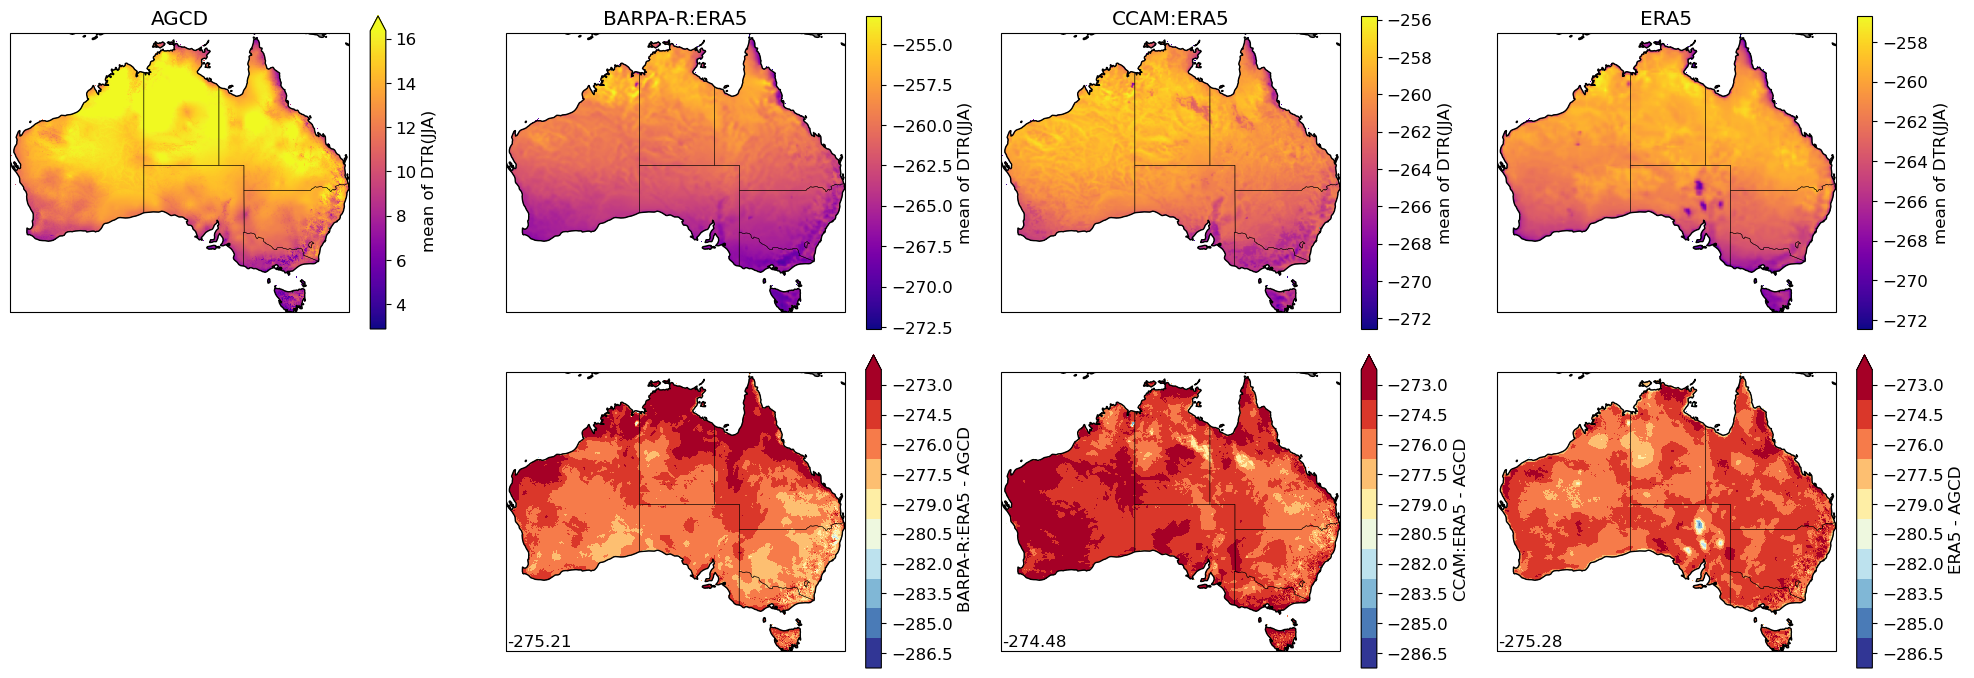

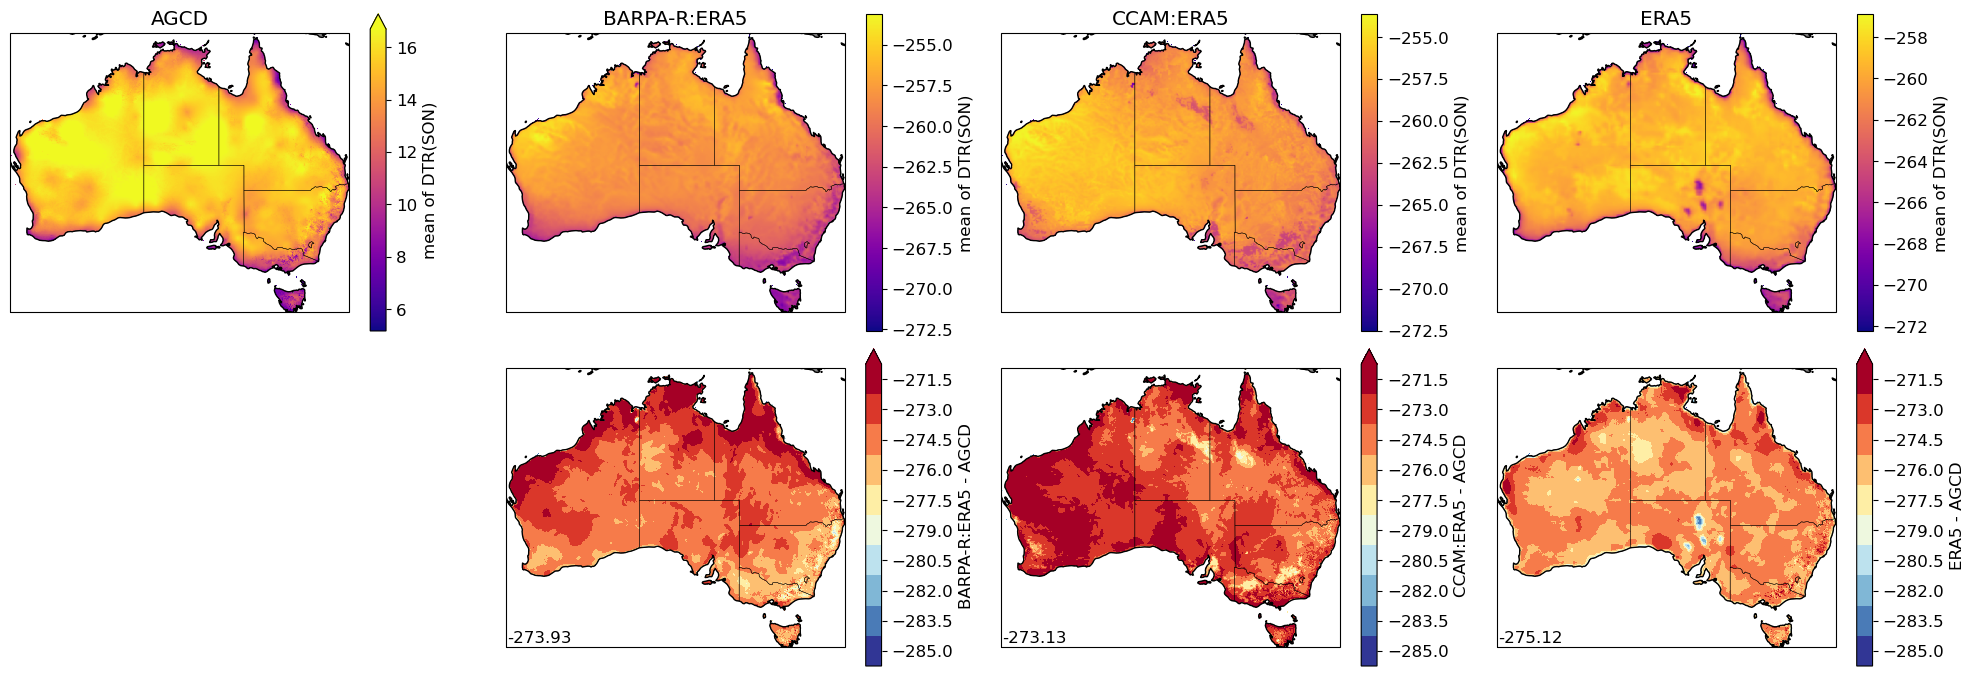

In [4]:
INDEXES = ['DTR', 'DTR:DJF', 'DTR:MAM', 'DTR:JJA', 'DTR:SON']
for index in INDEXES:
    print("index = {:}".format(index))
    
    # check whether the index has special conditions
    index_condition = None
    if not ":" in index:
        # Prepare all the icclim data as per the setup in CONFIGURATIONS
        ds = prepare_data(index)
        clabel = "mean of {index}({freq})".format(index=index, freq=FREQ)
    else:
        index_condition = index.split(":")[1]
        index = index.split(":")[0]
        ds = prepare_data(index, season=index_condition)
        clabel = "mean of {index}({index_condition})".format(index=index, index_condition=index_condition)
    
    ds_target = {}
    for s in SOURCES:
        ds_target[s] = ds[s][index].mean(dim='time')
        ds_target[s] = lib_spatial.apply_region_mask(ds_target[s], 'Australia')
        if 'PRCPTOT' in index:
            ds_target[s] = lib_spatial.apply_agcd_data_mask(ds_target[s])
            
    if index in ['DTR']:
        cmap_variable = 'temp'
        cmap_class = 'hot'
    
    lib_standards.spatial_plot(ds_target, reference=REFERENCE, 
                               cmap_variable=cmap_variable, cmap_class=cmap_class, 
                               clabel=clabel, plot_difference=True,
                               include_all_data=True, include_diff_avg=True)
    plt.tight_layout()
    plt.savefig("./figs/temp_range/temp_range_%s_%s.png"%(index,index_condition),dpi=300)

# vDTR: Mean day-to-day variation in Diurnal Temperature Range

index = vDTR
index = vDTR:DJF
index = vDTR:MAM
index = vDTR:JJA
index = vDTR:SON


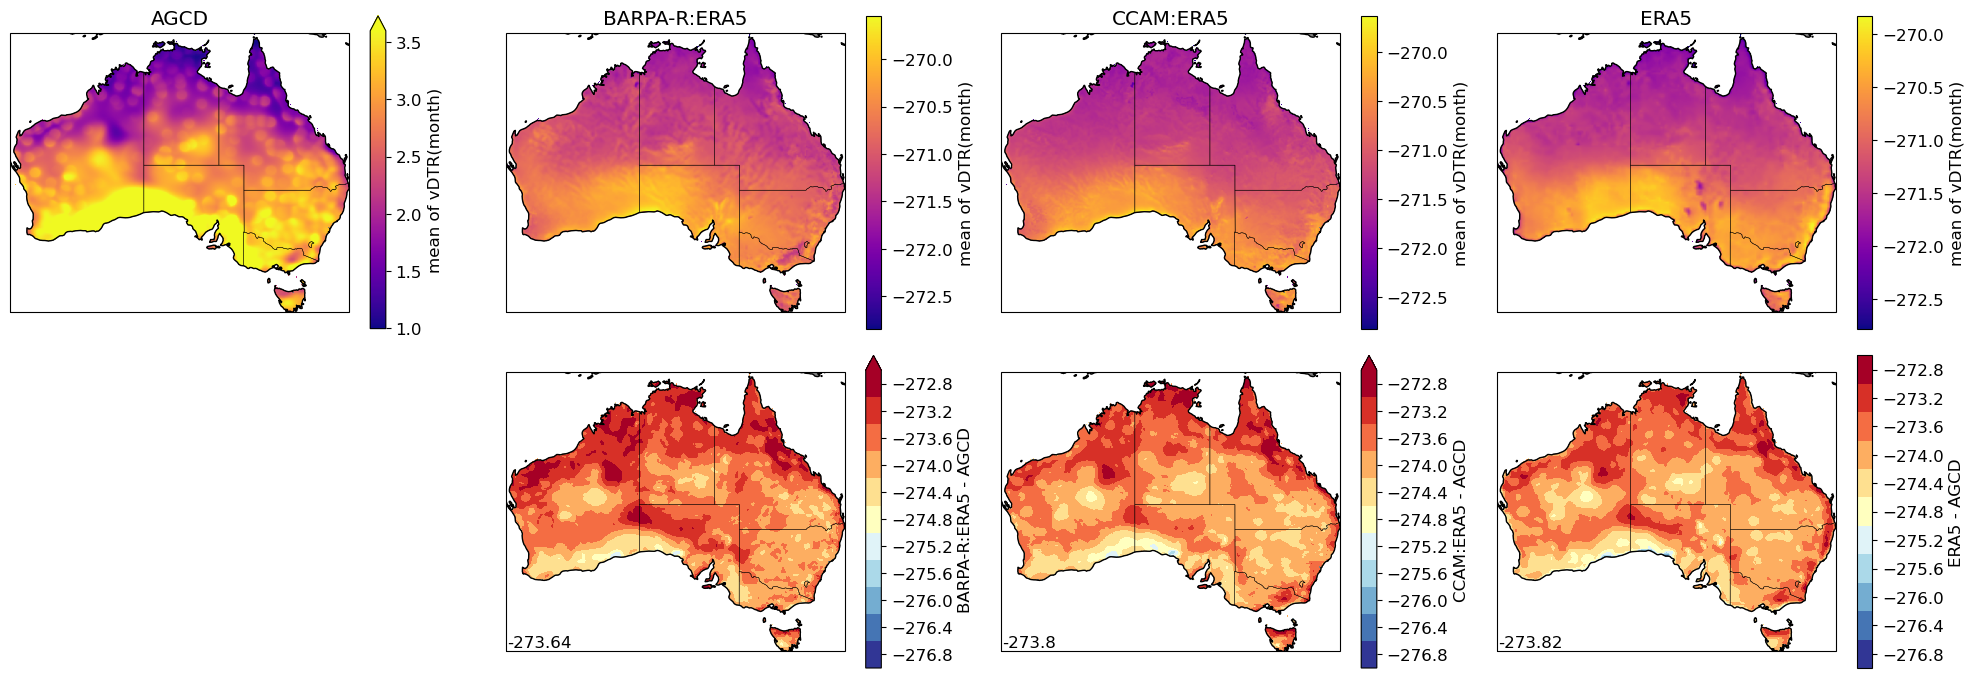

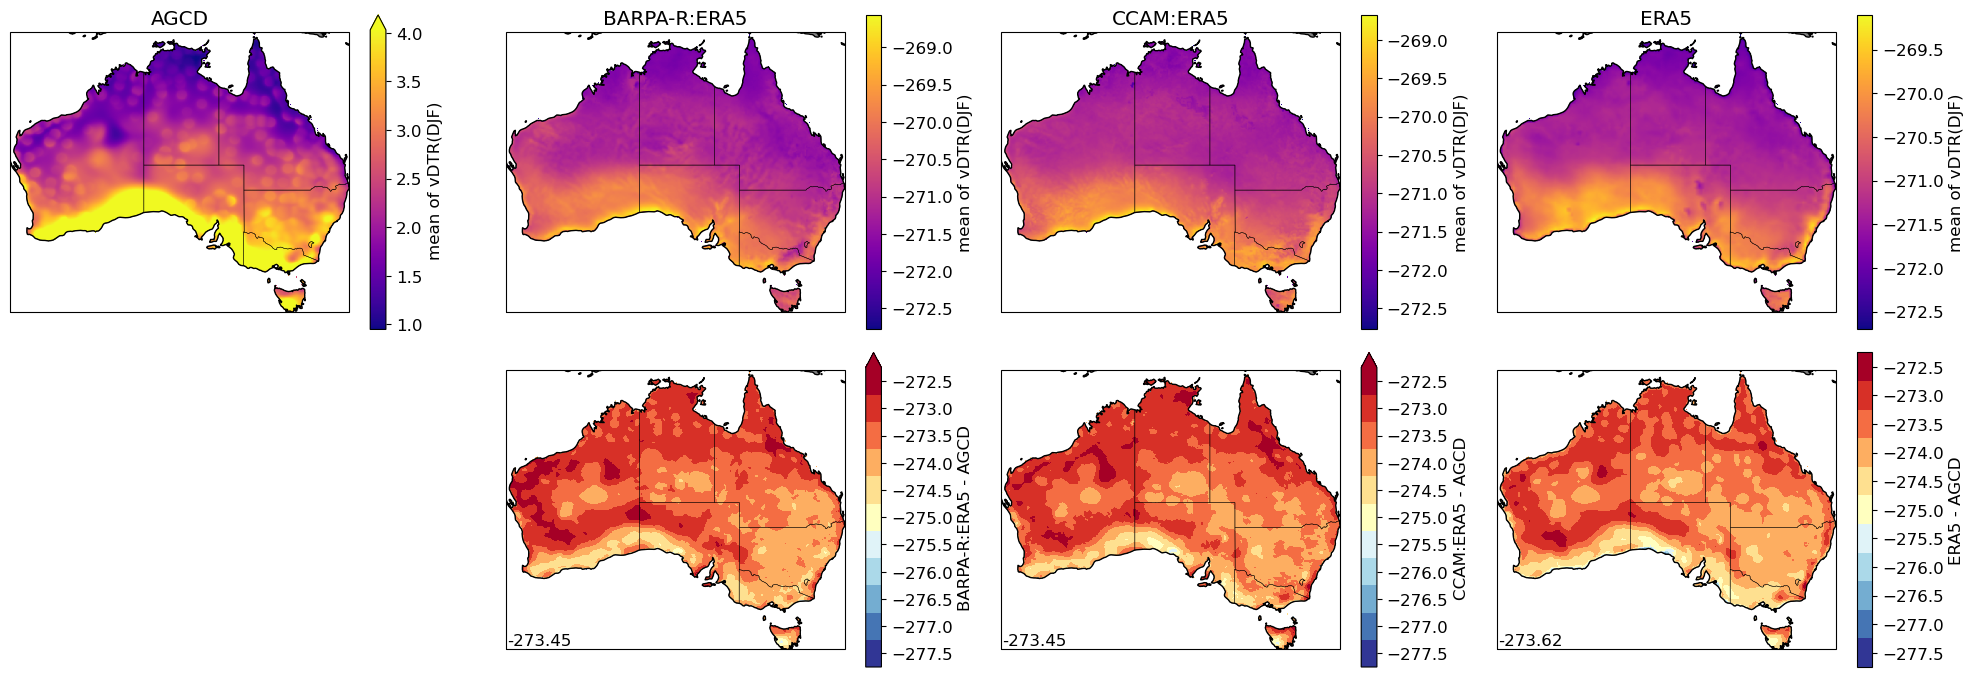

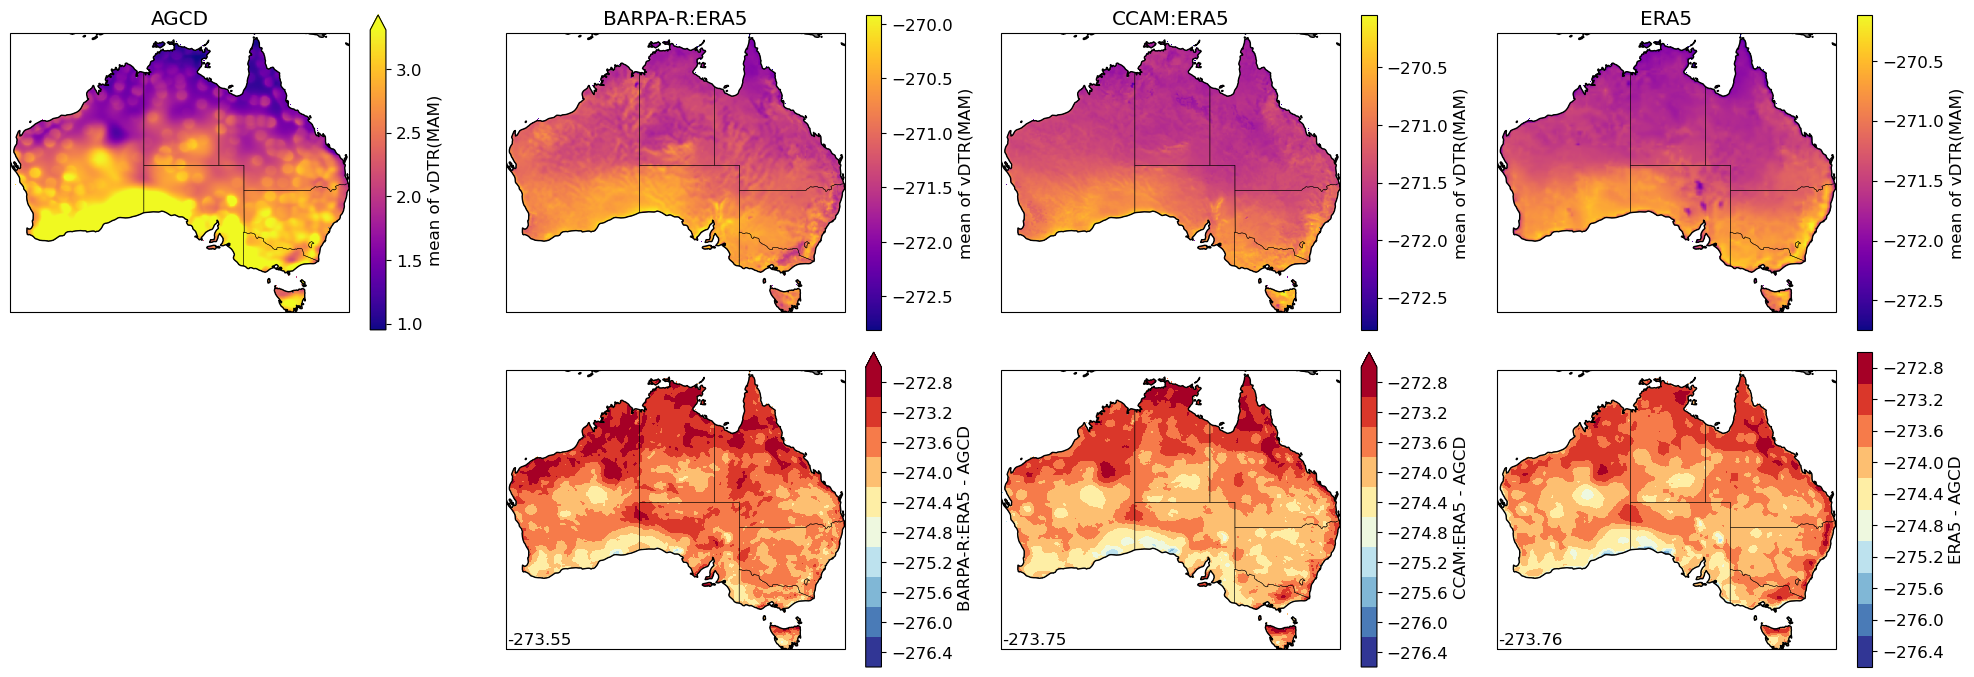

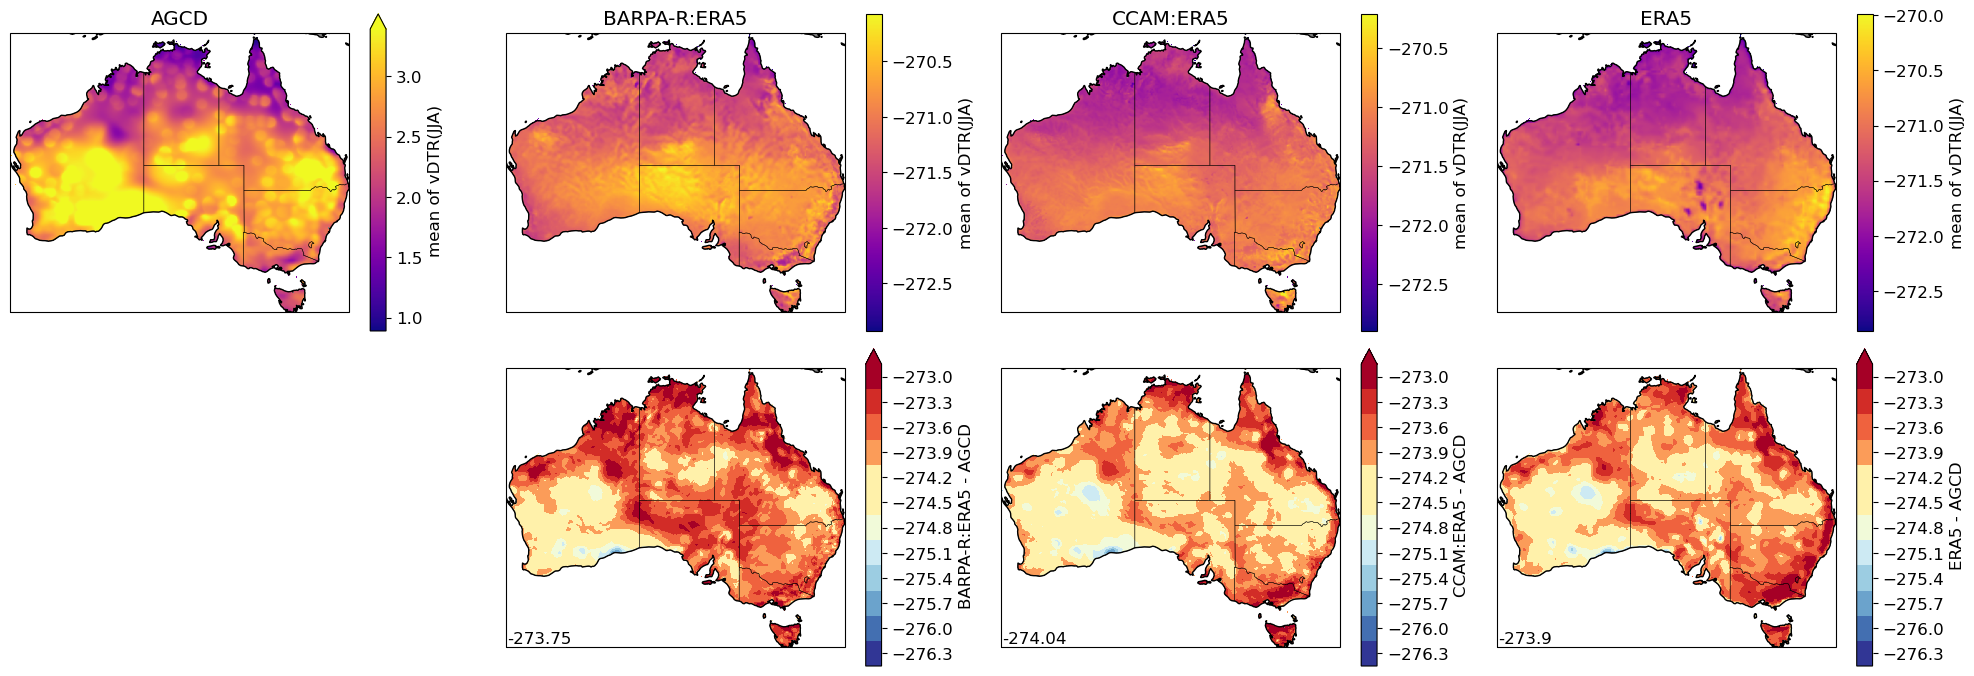

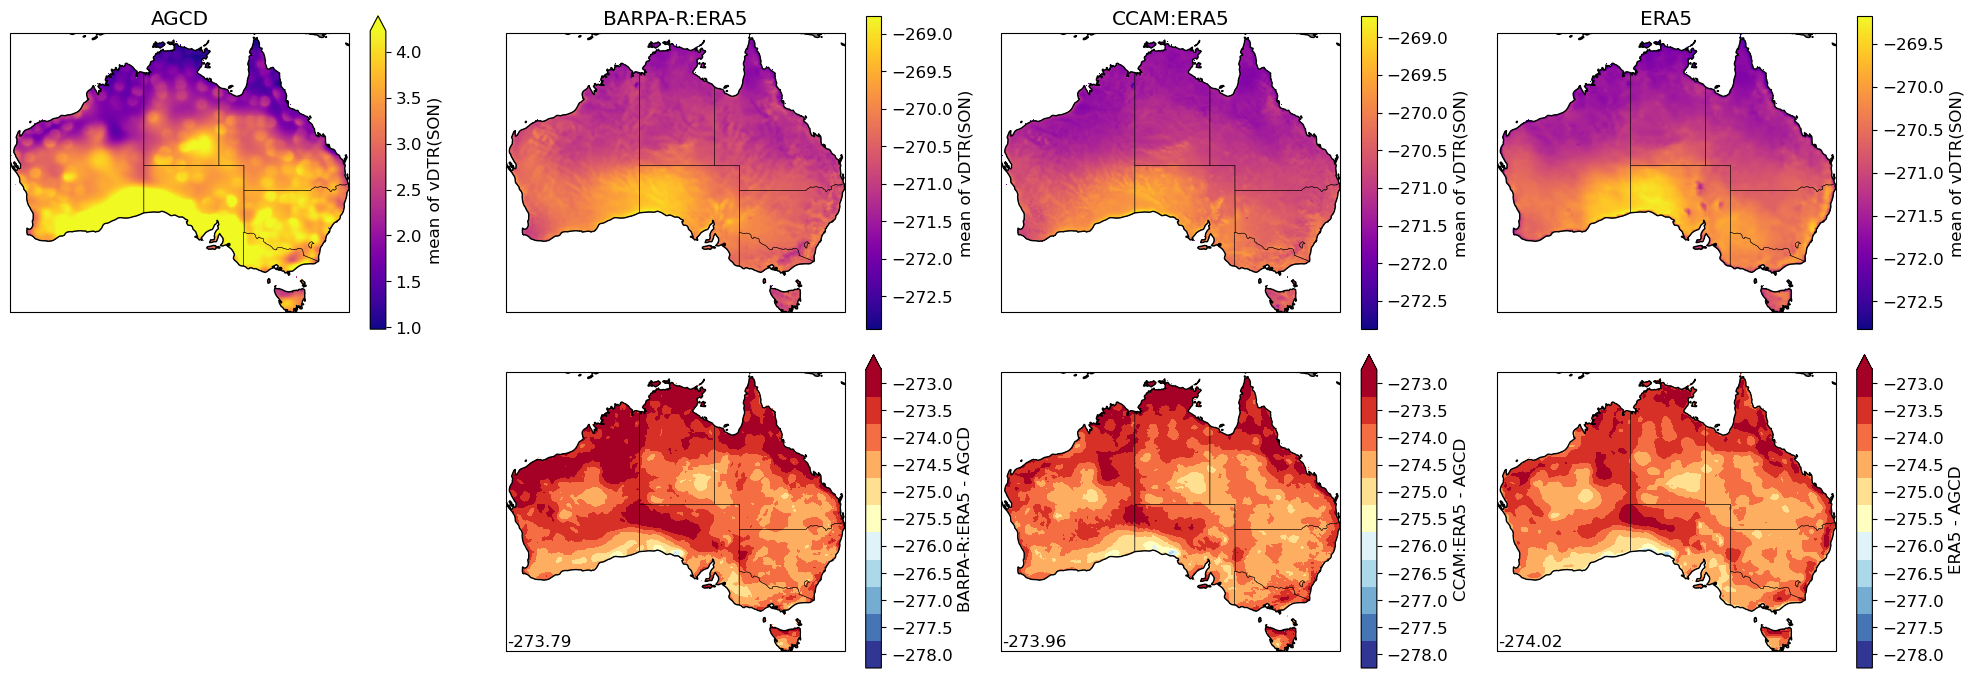

In [5]:
INDEXES = ['vDTR', 'vDTR:DJF', 'vDTR:MAM', 'vDTR:JJA', 'vDTR:SON']
for index in INDEXES:
    print("index = {:}".format(index))
    
    # check whether the index has special conditions
    index_condition = None
    if not ":" in index:
        # Prepare all the icclim data as per the setup in CONFIGURATIONS
        ds = prepare_data(index)
        clabel = "mean of {index}({freq})".format(index=index, freq=FREQ)
    else:
        index_condition = index.split(":")[1]
        index = index.split(":")[0]
        ds = prepare_data(index, season=index_condition)
        clabel = "mean of {index}({index_condition})".format(index=index, index_condition=index_condition)
    
    ds_target = {}
    for s in SOURCES:
        ds_target[s] = ds[s][index].mean(dim='time')
        ds_target[s] = lib_spatial.apply_region_mask(ds_target[s], 'Australia')
        if 'PRCPTOT' in index:
            ds_target[s] = lib_spatial.apply_agcd_data_mask(ds_target[s])
            
    if index in ['vDTR']:
        cmap_variable = 'temp'
        cmap_class = 'hot'
    
    lib_standards.spatial_plot(ds_target, reference=REFERENCE, 
                               cmap_variable=cmap_variable, cmap_class=cmap_class, 
                               clabel=clabel, plot_difference=True,
                               include_all_data=True, include_diff_avg=True)
    plt.tight_layout()
    plt.savefig("./figs/temp_range/temp_range_%s_%s.png"%(index,index_condition),dpi=300)

# ETR: Intra-period extreme temperature range

index = ETR
index = ETR:DJF
index = ETR:MAM
index = ETR:JJA
index = ETR:SON


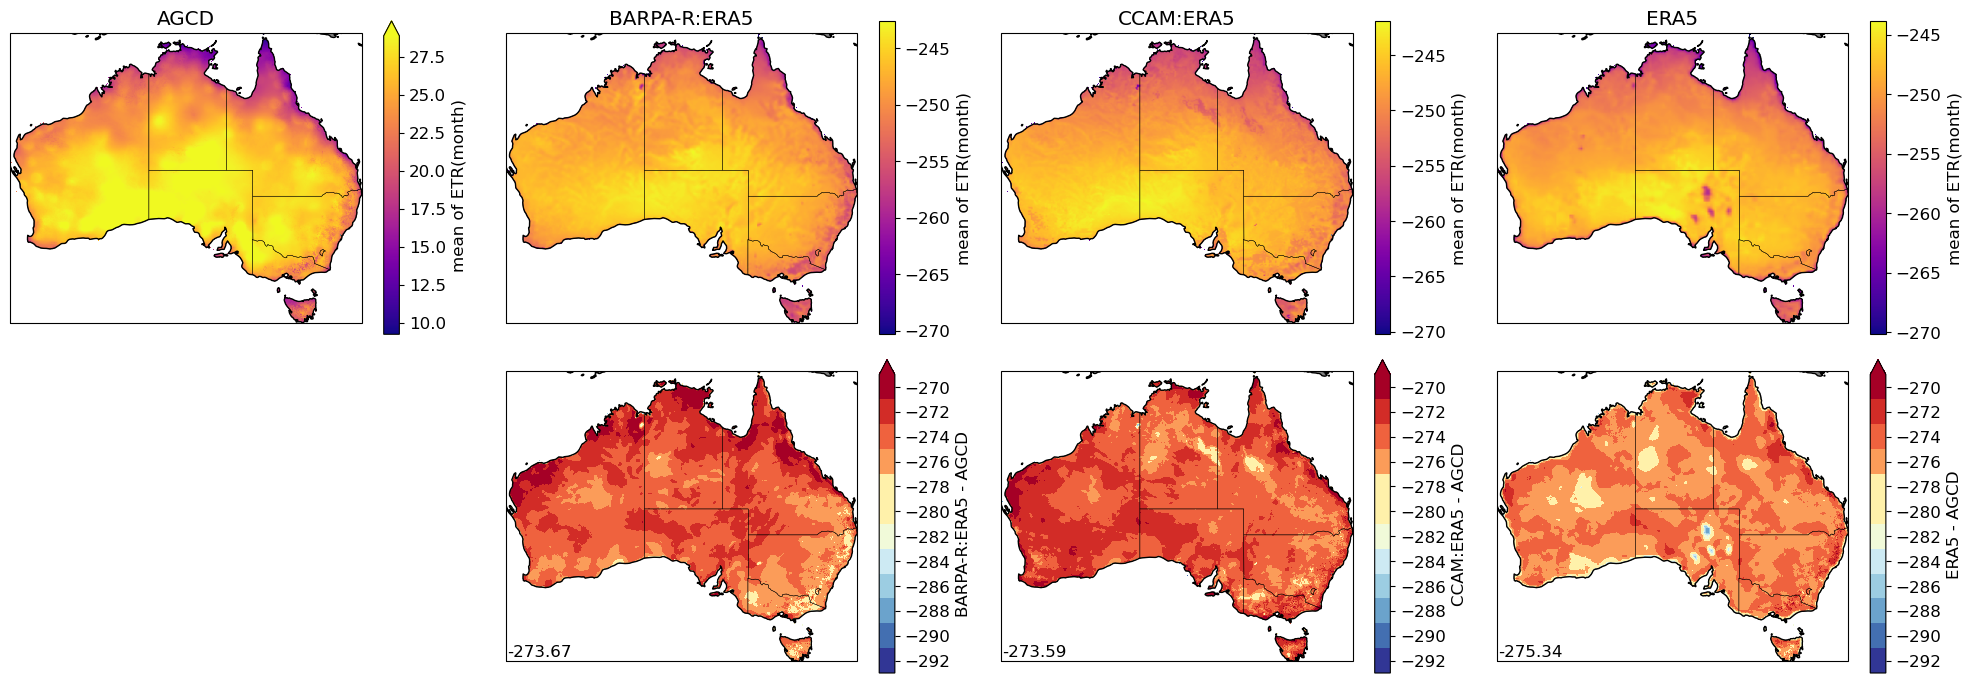

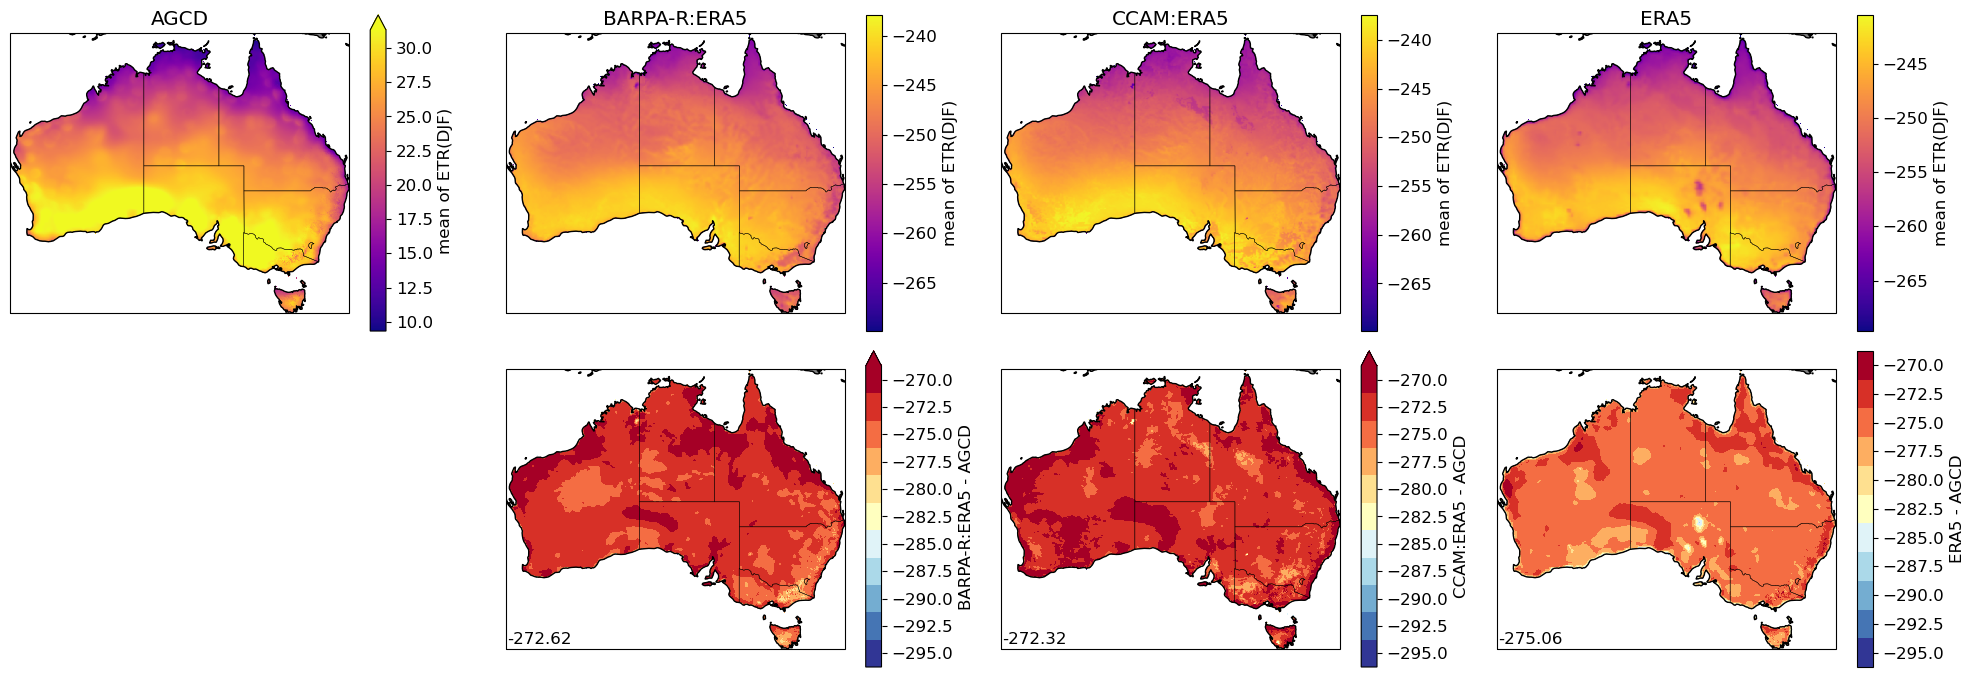

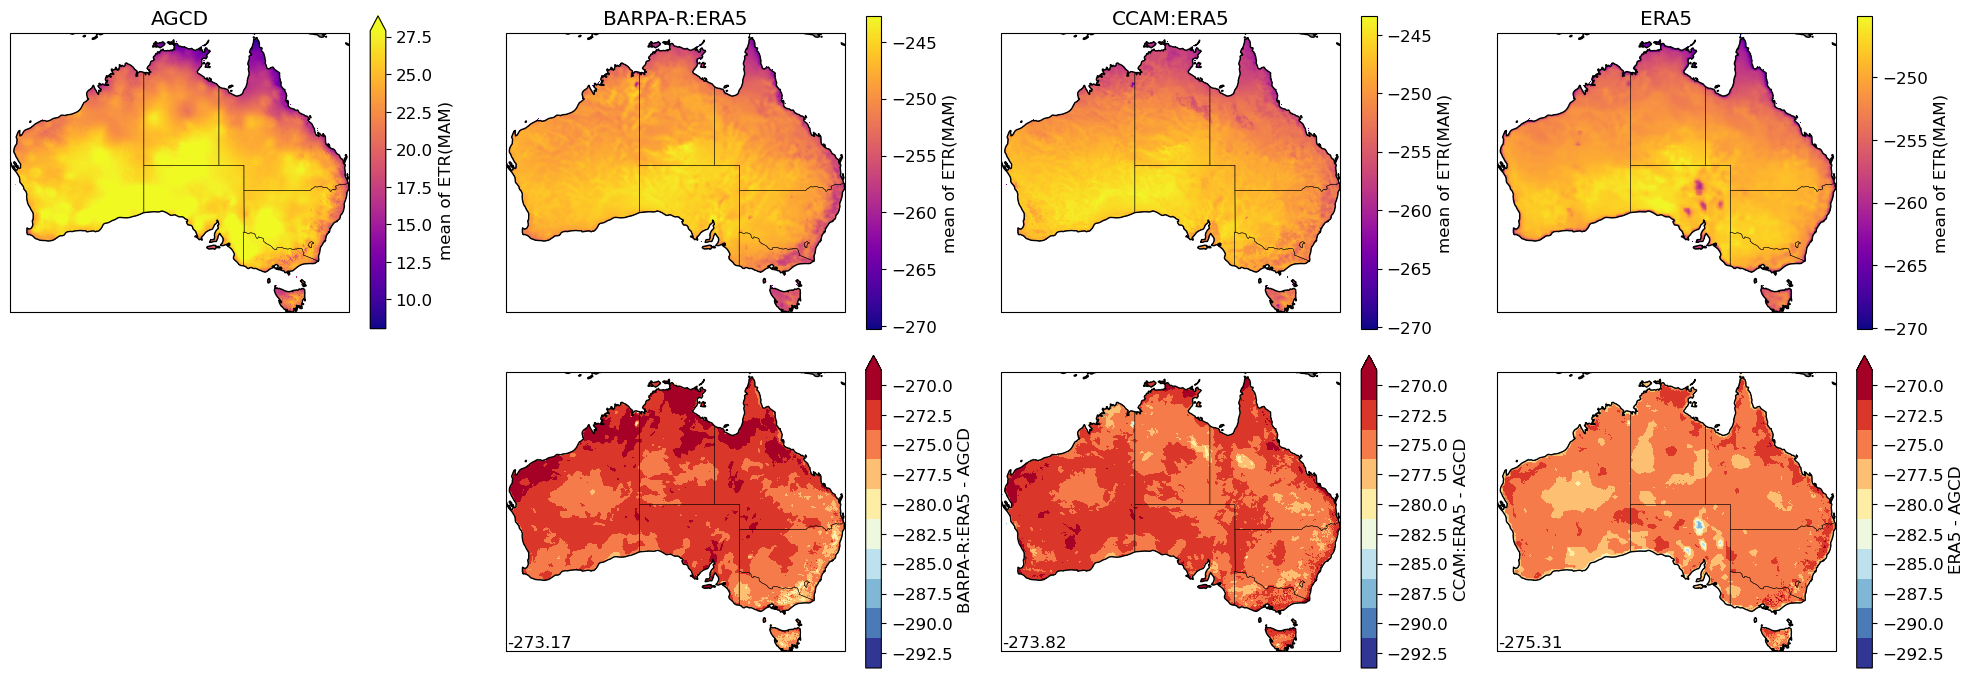

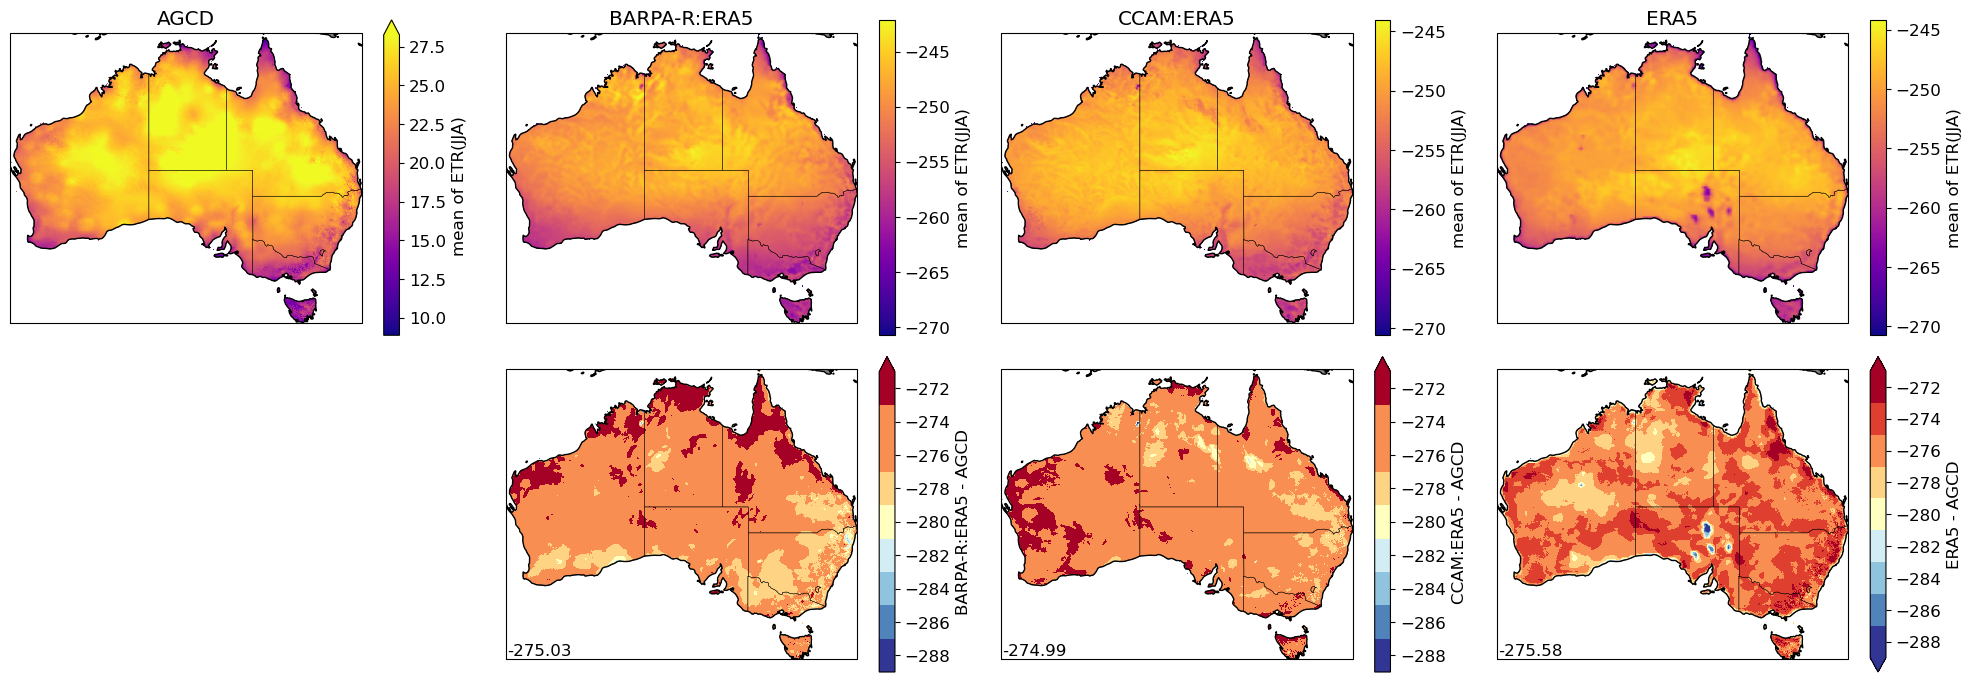

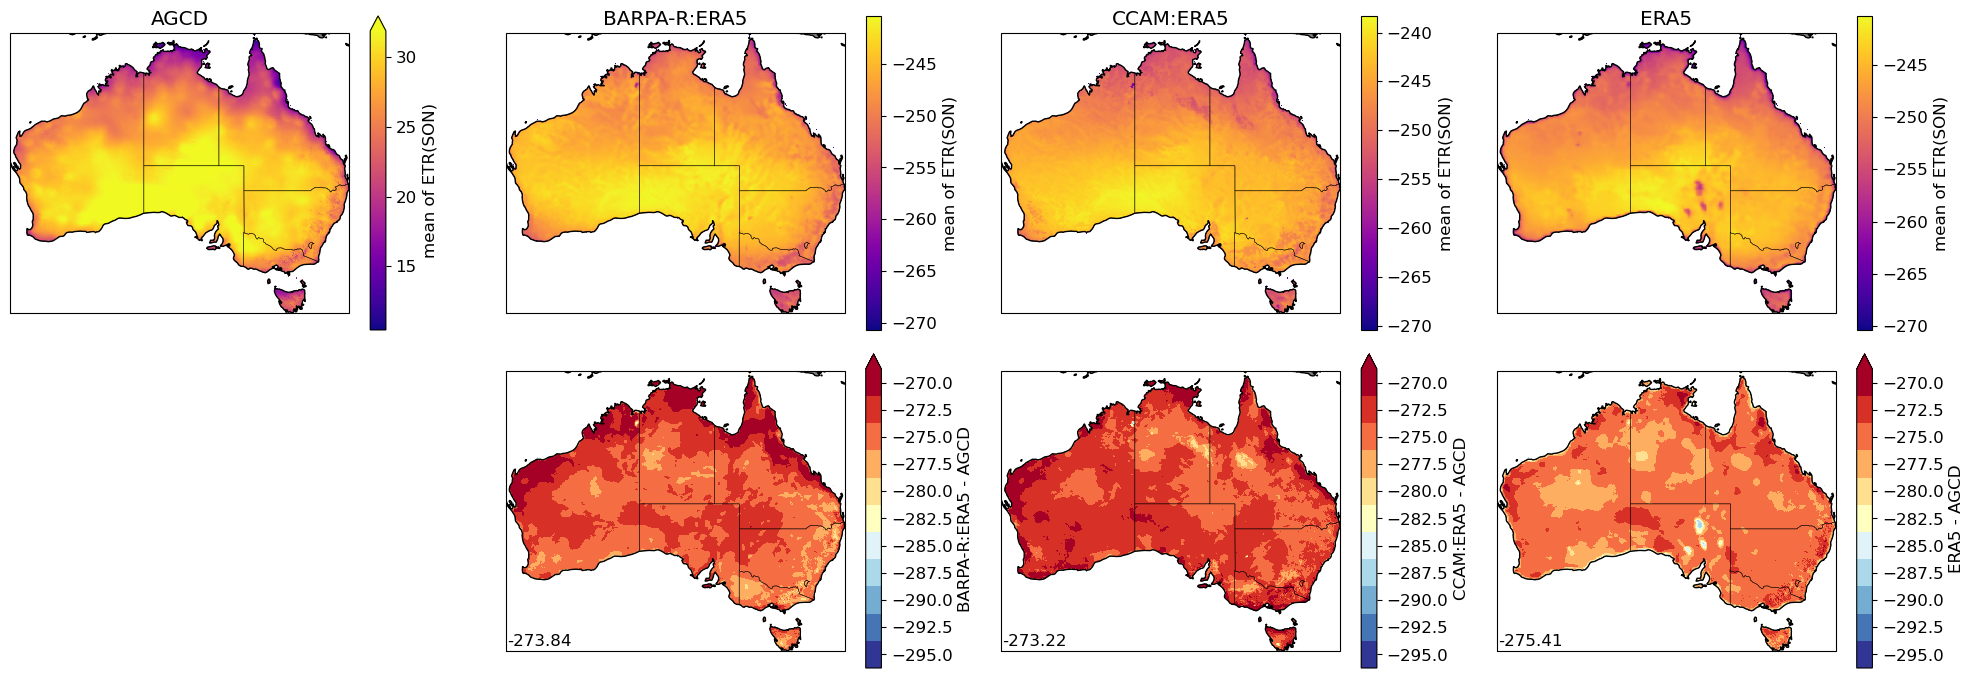

In [6]:
INDEXES = ['ETR', 'ETR:DJF', 'ETR:MAM', 'ETR:JJA', 'ETR:SON']
for index in INDEXES:
    print("index = {:}".format(index))
    
    # check whether the index has special conditions
    index_condition = None
    if not ":" in index:
        # Prepare all the icclim data as per the setup in CONFIGURATIONS
        ds = prepare_data(index)
        clabel = "mean of {index}({freq})".format(index=index, freq=FREQ)
    else:
        index_condition = index.split(":")[1]
        index = index.split(":")[0]
        ds = prepare_data(index, season=index_condition)
        clabel = "mean of {index}({index_condition})".format(index=index, index_condition=index_condition)
    
    ds_target = {}
    for s in SOURCES:
        ds_target[s] = ds[s][index].mean(dim='time')
        ds_target[s] = lib_spatial.apply_region_mask(ds_target[s], 'Australia')
        if 'PRCPTOT' in index:
            ds_target[s] = lib_spatial.apply_agcd_data_mask(ds_target[s])
            
    if index in ['ETR']:
        cmap_variable = 'temp'
        cmap_class = 'hot'
    
    lib_standards.spatial_plot(ds_target, reference=REFERENCE, 
                               cmap_variable=cmap_variable, cmap_class=cmap_class, 
                               clabel=clabel, plot_difference=True,
                               include_all_data=True, include_diff_avg=True)
    plt.tight_layout()
    plt.savefig("./figs/temp_range/temp_range_%s_%s.png"%(index,index_condition),dpi=300)